# Table of Contents
1. [Iris Data](#using-iris-data)
2. [Predicting House Value](#predicting-house-value)
3. [Outlier Detection](#outlier-detection)
4. [Scoring Functions](#Scoring-functions,-performance-of-model)
5. [Testing and Validating](#testing-and-validating)
6. [Cross-validation](#Cross-validation)
7. [Linear and Logistic Regression](#linear-and-logistic-regression)
8. [Word Tokenization](#word-tokenization)
9. [Using Panels](#using-panels)
10. [Learning Curve Visualization and Cross-validation](#learning-curve-visualization-and-cross-validation)
11. [Random Forest](#random-forest)

In [3]:
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

#example guassian matrix with loc=mean=1, scale=std dev=3, and 3x3 matrix
guassian= np.random.normal(loc=1.0, scale= 3.0, size=(3,3))
print(guassian)

[[ 0.05369147 -1.3648798   2.28355034]
 [-3.47652394  5.16290017  2.91225906]
 [ 1.37235991  0.34174314  3.7952174 ]]


In [8]:
#vctor and arrays
M= np.arange(5*5, dtype=float).reshape(5,5)
print(M)
coefs=np.array([1.,0.5,0.5,0.5,0.5])
coefs_matrix= np.column_stack((coefs,coefs[::-1]))
print (coefs_matrix)

[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  24.]]
[[ 1.   0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  1. ]]


In [11]:
#multiply the array with the vector then the vector by the array
print(np.dot(M,coefs))#top one
print(np.dot(coefs,M))

[  5.  20.  35.  50.  65.]
[ 25.  28.  31.  34.  37.]


In [14]:
#slicing and indexing
N=np.arange(10*10, dtype=int).reshape(10,10)#10 by 10 matrix
#[start_index_included:nd_index_exclude:steps]
#we want to extract even rows from 2 to 8
print(N[2:9:2,:])
#lets say we want only the columns from the index 5
print(N[2:9:2,5:])

[[20 21 22 23 24 25 26 27 28 29]
 [40 41 42 43 44 45 46 47 48 49]
 [60 61 62 63 64 65 66 67 68 69]
 [80 81 82 83 84 85 86 87 88 89]]
[[25 26 27 28 29]
 [45 46 47 48 49]
 [65 66 67 68 69]
 [85 86 87 88 89]]


# using iris data
[Top](#Table-of-contents)

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
print (iris.DESCR)
print (iris.feature_names)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

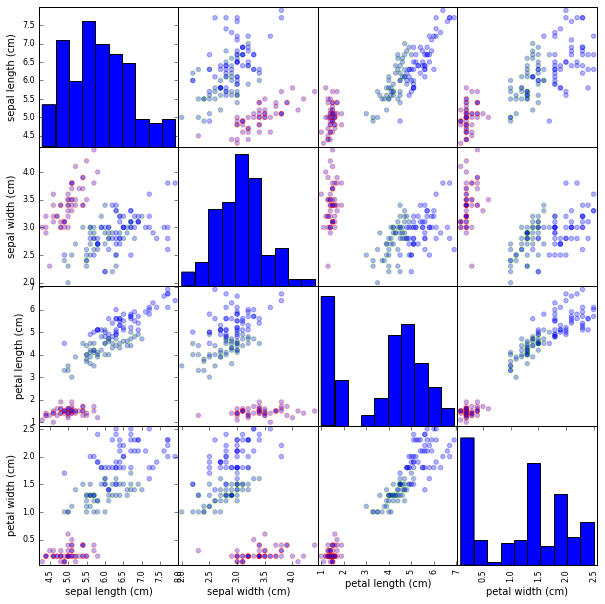

In [18]:
import pandas as pd
import numpy as np
colors=list()
palette= {0:"red", 1: "green", 2:"blue"}
for c in np.nditer(iris.target):colors.append(palette[int(c)])

dataframe=pd.DataFrame(iris.data, columns=iris.feature_names)

scatterplot= pd.scatter_matrix(dataframe, alpha=0.3,figsize=(10,10), diagonal='hist', color=colors, marker='o',grid=True)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


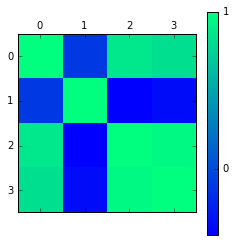

In [25]:
#Covariance matrix and comparing that to PCA
cov_data= np.corrcoef(iris.data.T)
print(cov_data)

import matplotlib.pyplot as plt
img= plt.matshow(cov_data, cmap=plt.cm.winter)
plt.colorbar(img, ticks= [-1,0,1])



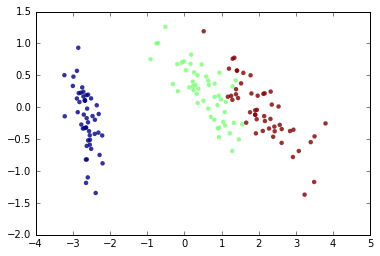

0.97763177502480336

In [27]:
#pca
from sklearn.decomposition import PCA
pca_2c= PCA(n_components=2)#2 means only 2 features, start by doing 1,2,3 and see which gives best number (want close to 1)
X_pca_2c= pca_2c.fit_transform(iris.data)
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')#the classes are pretty much neatly separated
plt.show()
pca_2c.explained_variance_ratio_.sum() #with 2 basis vectors the dataset contains almost 98% of the energy of input signal

#sometimes not effective enough so can whiten data by the code below, I won't do however because it only changes the scale of the scatter
#pca_2cw=PCA(n_components=2, whiten=True)
#X_pca_lcw= pca_2cw.fit_transform(iris.data)
#plt.scatter(X_pca_lcw[:,0],X_pca_lcw[:,1], c=iris.target, alpha=0.8,edgecolors='none');plt.show()

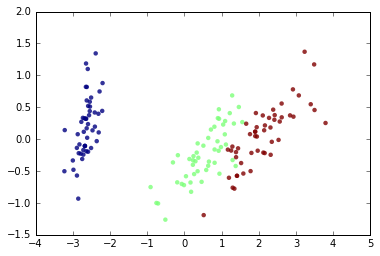

0.97763177502480403

In [29]:
#variation of PCA for big data
from sklearn.decomposition import RandomizedPCA
rpca_2c= RandomizedPCA(n_components=2)
X_rpca_2c= rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')#the classes are pretty much neatly separated
plt.show()
rpca_2c.explained_variance_ratio_.sum()

# predicting house value
[Top](#Table-of-contents)

In [21]:
#uses KNN regression
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
cali=datasets.california_housing.fetch_california_housing()
X= cali['data']
y= cali['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
regressor= KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_est= regressor.predict(X_test)
print("MAE=", mean_squared_error(y_test, y_est)) #should give 1.14943
#now want to normalize input features using z-score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
regressor= KNeighborsRegressor()
regressor.fit(X_train_scaled,y_train)
y_est= regressor.predict(X_test_scaled)
print("MAE=", mean_squared_error(y_test,y_est))#should give 0.41246 so better

#now let's try nonlinear modification, say on # of occupants in house
#let's add another feature  built as a nonlinear transform of another one
non_linear_feat= 5 #AveOccup
#creating new feature(sqrt of it) then added to the dataset, done to both train and test
X_train_new_feat= np.sqrt(X_train[:,non_linear_feat])
X_train_new_feat.shape=(X_train_new_feat.shape[0],1)
X_train_extended= np.hstack([X_train, X_train_new_feat])

X_test_new_feat= np.sqrt(X_test[:,non_linear_feat])
X_test_new_feat.shape=(X_test_new_feat.shape[0],1)
X_test_extended= np.hstack([X_test, X_test_new_feat])

scaler=StandardScaler()

X_train_extended_scaled= scaler.fit_transform(X_train_extended)
X_test_extended_scaled= scaler.transform(X_test_extended)
regressor= KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, y_train)
y_est= regressor.predict(X_test_extended_scaled)
print("MAE=", mean_squared_error(y_test,y_est))#should give 0.333 so even better 


downloading Cal. housing from http://lib.stat.cmu.edu/modules.php?op=modload&name=Downloads&file=index&req=getit&lid=83 to C:\Users\msteinme\scikit_learn_data


HTTPError: HTTP Error 404: Not Found

# outlier detection
[Top](#table-of-contents)

In [31]:

#only able to detect univariate outliers
#using z-score, anything larger than abs(3)
import numpy as np
from sklearn.datasets import load_boston
boston=load_boston()
continuous_variables= [n for n in range(np.shape(boston.data)[1]) if n!=3]
from sklearn import preprocessing
normalized_data= preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
outliers_rows, outliers_columns= np.where(np.abs(normalized_data)>3)
print (list(zip(outliers_rows, outliers_columns)))

[(55, 1), (56, 1), (57, 1), (102, 10), (141, 11), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (225, 4), (256, 1), (257, 4), (262, 4), (283, 1), (284, 1), (347, 1), (351, 6), (352, 6), (353, 1), (353, 6), (354, 6), (355, 6), (364, 4), (365, 4), (367, 4), (373, 11), (374, 4), (374, 11), (380, 0), (398, 0), (404, 0), (405, 0), (406, 4), (410, 0), (410, 10), (411, 10), (412, 10), (412, 11), (414, 0), (414, 11), (415, 10), (416, 10), (418, 0), (418, 10), (419, 10), (423, 10), (424, 10), (425, 10), (426, 10), (427, 0), (427, 10), (429, 10), (431, 10), (436, 10), (437, 10), (438, 10), (445, 10), (450, 10), (454, 10), (455, 10), (456, 10), (457, 10), (466, 10)]


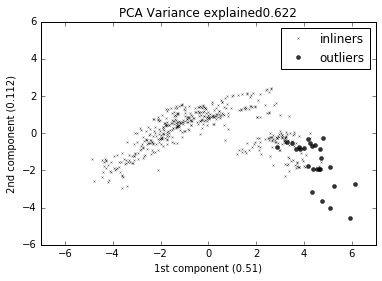

In [35]:
#using PCA and elliptic envelope(fits hypothetical guassian distribution)
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
pca= PCA(n_components=2)
Zscore_components= pca.fit_transform(normalized_data)
vtot= 'PCA Variance explained' + str(round(np.sum(pca.explained_variance_ratio_),3))
v1= str(round(pca.explained_variance_ratio_[0],3))
v2= str(round(pca.explained_variance_ratio_[1],3))

#robust covariance estimate
robust_covariance_est= EllipticEnvelope(store_precision=False, assume_centered=False, contamination=0.05)
robust_covariance_est.fit(normalized_data)
detection= robust_covariance_est.predict(normalized_data)
outliers= np.where(detection==-1)
regular= np.where(detection==1)

#draw the distribution and the detected outliers
from matplotlib import pyplot as plt
a= plt.plot(Zscore_components[regular,0],Zscore_components[regular,1], 'x', markersize=2, color='black', alpha=0.6, label='inliners')
b= plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,1], 'o', markersize=4, color='black', alpha=0.8, label='outliers')
plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.legend((a[0],b[0]), ('inliners','outliers'), numpoints=1, loc= 'best')
plt.title(vtot)
plt.show()

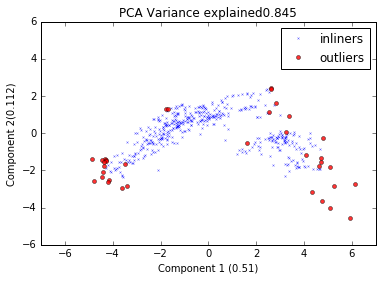

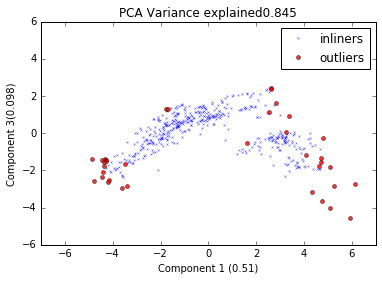

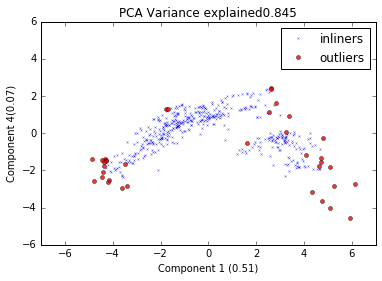

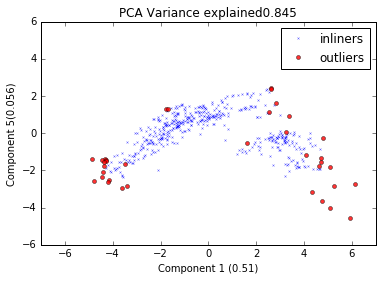

In [44]:
#detecting outliers using OneClass SVM, pg111
from sklearn import svm
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import load_boston

boston=load_boston()
continuous_variables= [n for n in range(np.shape(boston.data)[1]) if n!=3]
normalized_data= preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
pca= PCA(n_components=5)
Zscore_components= pca.fit_transform(normalized_data)
vtot= 'PCA Variance explained' + str(round(np.sum(pca.explained_variance_ratio_),3))

#oneclass svm fitting and estimates
outliers_fraction= 0.02
nu_estimate = 0.95 *outliers_fraction +0.05
machine_learning= svm.OneClassSVM(kernel='rbf', gamma=1.0/len(normalized_data), degree=3, nu=nu_estimate)
machine_learning.fit(normalized_data)
detection= machine_learning.predict(normalized_data)
outliers= np.where(detection==-1)
regular= np.where(detection==1)

#draw the  distribution and the detected outliers
from matplotlib import pyplot as plt
for r in range (1,5):
    a= plt.plot(Zscore_components[regular,0],Zscore_components[regular,1], 'x', markersize=2, color='blue', alpha=0.6, label='inliners')
    b= plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,1], 'o', markersize=4, color='red', alpha=0.8, label='outliers')
    plt.xlabel('Component 1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
    plt.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
    plt.xlim([-7,7])
    plt.ylim([-6,6])
    plt.legend((a[0],b[0]), ('inliners','outliers'), numpoints=1, loc= 'best')
    plt.title(vtot)
    plt.show()

# Scoring functions, performance of model
[Top](#Table-of-contents)

In [50]:
#Multilabel classification(when your task is to predict more than a single label)
from sklearn import datasets
iris= datasets.load_iris()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.50, random_state=4)

#use very bad multiclass classifier
from sklearn.tree import  DecisionTreeClassifier
classifier= DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print(iris.target_names)

#confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

#precision, accuracy, etc output
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred, target_names= iris.target_names))

print ("Accuracy:", metrics.accuracy_score(y_test,y_pred))

['setosa' 'versicolor' 'virginica']
[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        30
 versicolor       0.90      0.86      0.88        22
  virginica       0.88      0.91      0.89        23

avg / total       0.93      0.93      0.93        75

Accuracy: 0.933333333333


In [54]:
#binary classification (only 2 output class like Male or Female: will buy or won't buy)
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [56]:
#for regression look at mean absolute error, mean squared error, R^2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print ("mean absolute error:", mean_absolute_error([1.0,0.0,0.0],[0.0,0.0,-1.0]))
print ("mean squared error:", mean_squared_error([-10.0,0.0,0.0],[0.0,0.0,0.0]))
print ("R^2:", r2_score([-10.0,0.0,0.0],[0.0,0.0,0.0]))

mean absolute error: 0.666666666667
mean squared error: 33.3333333333
R^2: -0.5


# testing and validating
[Top](#table-of-contents)

In [73]:
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn import cross_validation

digits=load_digits()
X=digits.data
y=digits.target

#3 different hypothesis
h1= svm.LinearSVC(C=1.0)  #linear svc
h2= svm.SVC(kernel='rbf', degree=3, gamma= 0.001, C=1.0)  #radial basis svc
h3=svm.SVC(kernel='poly', degree= 3, C=1.0)  #3rd degree polynomial SVC

chosen_random_state = 1  #do this test about 30 times to see if significant difference (shanging this value)
X_train, X_validation_test, y_train, y_validation_test= cross_validation.train_test_split(X,y, test_size=0.40, random_state=chosen_random_state)
X_validation, X_test, y_validation,y_test= cross_validation.train_test_split(X_validation_test, y_validation_test, test_size=.50, random_state=chosen_random_state)

print ("X train shape %s, X validation shape %s, X test shape %s,\n" 
"y train shape %s, y validation shape %s, y test shape %s \n" %(X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape))
for hypothesis in [h1,h2,h3]:
    hypothesis.fit(X_train, y_train)
    print (("%s -> validation mean accuracy= %0.3f") % (hypothesis, hypothesis.score(X_validation, y_validation)))
h2.fit(X_train,y_train) #did h2 because if look at output from above that hypothesis had highest mean=0.992
print (("%s-> test mean accuracy= %0.3f") % (h2,h2.score(X_test,y_test)))

X train shape (1078, 64), X validation shape (359, 64), X test shape (360, 64),
y train shape (1078,), y validation shape (359,), y test shape (360,) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) -> validation mean accuracy= 0.964
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> validation mean accuracy= 0.992
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> validation mean accuracy= 0.989
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_sha

# Cross-validation
[Top](#table-of-contents)
##### use just for optimization, it just points out the best possible algorithm and parameter choice on the basis of the best average result

In [6]:
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn import cross_validation
import numpy as np

digits=load_digits()
X=digits.data
y=digits.target

#3 different hypothesis
h1= svm.LinearSVC(C=1.0)  #linear svc
h2= svm.SVC(kernel='rbf', degree=3, gamma= 0.001, C=1.0)  #radial basis svc
h3=svm.SVC(kernel='poly', degree= 3, C=1.0)  #3rd degree polynomial SVC

#this way is shorter and usually more accurate than the previous way
choosen_random_state= 1
cv_folds= 10 #try 3, 5, or 20
eval_scoring= 'accuracy' #also try f1
workers= -1 #this will use all of your CPU power
X_train, X_test, y_train, y_test= cross_validation.train_test_split(X, y, test_size=0.30, random_state=choosen_random_state)
for hypothesis in [h1, h2, h3]:
    scores= cross_validation.cross_val_score(hypothesis, X_train, y_train, cv=cv_folds, scoring=eval_scoring, n_jobs=workers)
    print (("%s-> cross validation accuracy: mean= %0.3f std= %0.3f")% (hypothesis, np.mean(scores), np.std(scores)))
    print(scores)  #this array output will show score 9 consec. times (different splits each time)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)-> cross validation accuracy: mean= 0.938 std= 0.024
[ 0.92248062  0.89147287  0.953125    0.95238095  0.96031746  0.944       0.976
  0.944       0.91869919  0.91735537]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)-> cross validation accuracy: mean= 0.990 std= 0.007
[ 0.98449612  0.98449612  0.9921875   0.98412698  0.99206349  1.          0.992
  0.976       0.99186992  1.        ]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=Fals

In [8]:
#hyperparameters  also look at pg 157 for another example more in depth
h=svm.SVC()               #1st hypothesis
hp= svm.SVC(probability=True, random_state=1)#2nd hypothesis
from sklearn import grid_search
search_grid=[{'C':[1,10,100,1000],'kernel':['linear']}, {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},]
scorer= 'accuracy'
search_func= grid_search.GridSearchCV(estimator=h,param_grid=search_grid, scoring=scorer, n_jobs=-1,iid=False, refit=True,cv=10)
%timeit search_func.fit(X,y)
print (search_func.best_estimator_)
print (search_func.best_params_)
print (search_func.best_score_) #the best solution is svc with gamma=0.001, rbf kernel, C=10
                                

1 loops, best of 3: 6.22 s per loop
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
0.981081122784


In [14]:
#univariate selection

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import Binarizer, scale
X,y=make_classification(n_samples=800, n_features=100, n_informative=25, n_redundant=0, random_state=101) #800 cases and 100 features
Xbin=Binarizer().fit_transform(scale(X))
Selector_chi2= SelectPercentile (chi2, percentile=25).fit(Xbin,y)
Selector_f_classif= SelectPercentile (f_classif, percentile=25).fit(X,y)
chi_scores= Selector_chi2.get_support()
f_classif_scores= Selector_f_classif.get_support()
selected= chi_scores & f_classif_scores
#there is no print so don't know what to do at this time, should say 21 predictive used in both models

#using l1-based selction may work better on pg 140
#recursive elimination (potentially excludes variables so that's the downside)
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X,y=make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=101)
classifier= LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)
selector= RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
selector.fit(X_train, y_train)
print ("optimal number of features: %d" %selector.n_features_)

optimal number of features: 4


# linear and logistic regression
[Top](#Table-of-contents)

In [25]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import classification_report
#linear regression
boston=load_boston()
X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)
regr=LinearRegression()
regr.fit(X_train,y_train)
y_pred= regr.predict(X_test)
print ("MAE is", mean_absolute_error(y_test, y_pred))

#logistic regression, changing data to binary classification
avg_price_house= np.average(boston.target)
high_priced_idx= (y_train >= avg_price_house)
y_train[high_priced_idx]=1                                                                                    
y_train[np.logical_not(high_priced_idx)]=0
y_train=y_train.astype(np.int8)
high_priced_idx= (y_test >= avg_price_house)
y_test[high_priced_idx]=1
y_test[np.logical_not(high_priced_idx)]=0
y_test= y_test.astype(np.int8)

clf=LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print (classification_report(y_test, y_pred))

MAE is 3.84281058945
             precision    recall  f1-score   support

          0       0.81      0.92      0.86        61
          1       0.85      0.68      0.76        41

avg / total       0.83      0.82      0.82       102



In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris=datasets.load_iris()
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit()
#pg 62 of machine python

# word tokenization
[Top](#table-of-contents)

In [2]:
my_text= "The coolest job in the next 10 years will be statisticians. people think I'm joking, but who would've guessed that computer engineers would've been the coolest job of the 1980s?"
simple_tokens=my_text.split(' ')
print(simple_tokens)

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'people', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guessed', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'coolest', 'job', 'of', 'the', '1980s?']


In [5]:
import nltk
nltk_tokens=nltk.word_tokenize(my_text)
print (nltk_tokens)

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'people', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guessed', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1980s', '?']


# using panels
[Top](#table-of-contents)

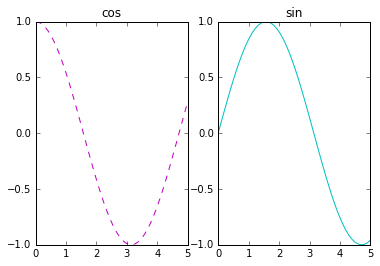

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
x=np.linspace(0,5,50)
y_cos=np.cos(x)
y_sin=np.sin(x)

plt.subplot(1,2,1) #defines 1 row, 2 columns, activates figure1
plt.plot(x,y_cos,'m--')
plt.title('cos')
plt.subplot(1,2,2) #defines 1 row, 2 column, activates figure 2
plt.plot(x,y_sin,'c-')
plt.title('sin')
plt.show() #close a figure


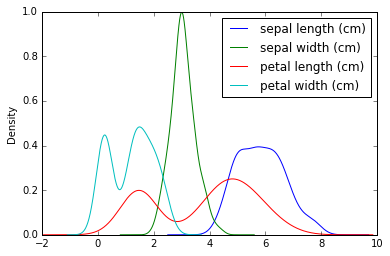

In [14]:
from sklearn import datasets
iris=datasets.load_iris()
iris_df= pd.DataFrame(iris.data, columns=iris.feature_names)
import pandas as pd
import numpy as np
density_plot= iris_df.plot(kind='density')

# learning curve visualization and cross-validation
[Top](#table-of-contents)

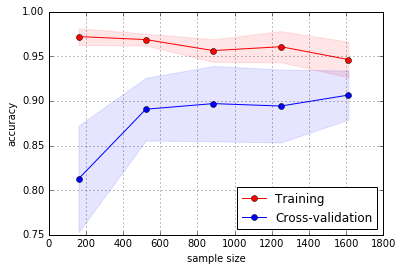

In [20]:
import numpy as np
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
digits= load_digits()
X,y= digits.data, digits.target
hypothesis= SGDClassifier (loss='log', shuffle=True, n_iter=5,penalty='l2',alpha=0.0001, random_state=3)
train_size, train_scores, test_scores = learning_curve(hypothesis,X,y,train_sizes=np.linspace(0.1,1.0,5),cv=10,scoring='accuracy', exploit_incremental_learning=False,n_jobs=-1)
mean_train=np.mean(train_scores, axis=1)
upper_train= np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train= np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test=np.mean(test_scores, axis=1)
upper_test= np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test= np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.plot(train_size, mean_train, 'ro-',label='Training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1,color='r')
plt.plot(train_size, mean_test, 'bo-',label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1,color='b')
plt.grid()
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints=1)
plt.show()



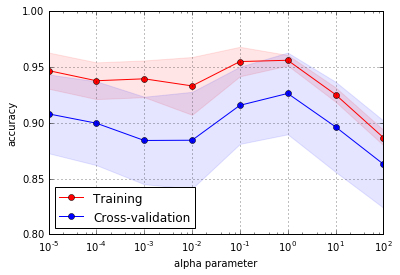

In [21]:
#validation curves estimate performance with respect to the values that the hyper-parameter can take
from sklearn.learning_curve import validation_curve
testing_range= np.logspace(-5,2,8)
hypothesis= SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores= validation_curve(hypothesis, X,y,param_name='alpha',param_range=testing_range, cv=10, scoring='accuracy', n_jobs=-1)
mean_train=np.mean(train_scores, axis=1)
upper_train= np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train= np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test=np.mean(test_scores, axis=1)
upper_test= np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test= np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.semilogx(testing_range, mean_train, 'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color= 'r')
plt.semilogx(testing_range, mean_test, 'bo-', label='Cross-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color= 'b')
plt.grid()
plt.xlabel('alpha parameter')
plt.ylabel('accuracy')
plt.ylim(0.8,1.0)
plt.legend(loc='lower left',numpoints=1)
plt.show()

# random forest
[Top](#table-of-contents)
random forest less greedy than stepwise regression

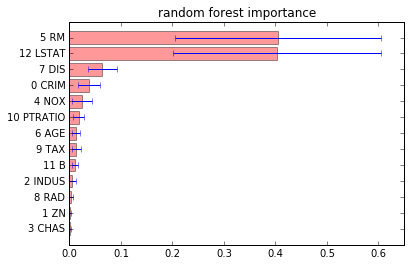

In [24]:
from sklearn.datasets import load_boston
import numpy as np
boston= load_boston()
X,y= boston.data, boston.target
feature_names=np.array([' '.join([str(b),a])for a,b in zip(boston.feature_names,range(len(boston.feature_names)))])
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=100,random_state=101).fit(X,y)
importance= np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std=np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices=np.argsort(importance)
range_=range(len(importance))
plt.figure()
plt.title('random forest importance')
plt.barh(range_,importance[indices],color='r',xerr=std[indices],alpha=0.4, align='center')
plt.yticks(range(len(importance)),feature_names[indices])
plt.ylim([-1,len(importance)])
plt.xlim([0.0,0.65])
plt.show()

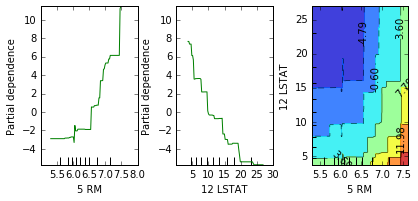

In [25]:
#GBT partial dependence plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBM=GradientBoostingRegressor(n_estimators=100,random_state=101).fit(X,y)
features=[5,12,(5,12)]
fig, axis= plot_partial_dependence(GBM, X, features,feature_names=feature_names)

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing


def main():
    cal_housing = fetch_california_housing()

    # split 80/20 train-test
    X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                        cal_housing.target,
                                                        test_size=0.2,
                                                        random_state=1)
    names = cal_housing.feature_names

    print('_' * 80)
    print("Training GBRT...")
    clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
    clf.fit(X_train, y_train)
    print("done.")

    print('_' * 80)
    print('Convenience plot with ``partial_dependence_plots``')
    print

    features = [0, 5, 1, 2, (5, 1)]
    fig, axs = plot_partial_dependence(clf, X_train, features,
                                       feature_names=names,
                                       n_jobs=3, grid_resolution=50)
    fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

    print('_' * 80)
    print('Custom 3d plot via ``partial_dependence``')
    print
    fig = plt.figure()

    target_feature = (1, 5)
    pdp, (x_axis, y_axis) = partial_dependence(clf, target_feature,
                                               X=X_train, grid_resolution=50)
    XX, YY = np.meshgrid(x_axis, y_axis)
    Z = pdp.T.reshape(XX.shape).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of house value on median age and '
                 'average occupancy')
    plt.subplots_adjust(top=0.9)

    plt.show()


Automatically created module for IPython interactive environment


In [ ]:
#looking at trend over yrs with crude
import pandas, seaborn
 
# create an Excel file object
excel = pandas.ExcelFile( '/Users/connorjohnson/Downloads/PET_PRI_SPT_S1_W.xls' )
 
# parse the first sheet
df = excel.parse( excel.sheet_names[1] )
 
# rename the columns
df = df.rename( columns=dict( zip( df.columns, ['Date','WTI','Brent'] ) ) )
 
# cut off the first 18 rows because these rows
# contain NaN values for the Brent prices
df = df[18:]
 
# index the data set by date
df.index = df['Date']
 
# remove the date column after re-indexing
df = df[['WTI','Brent']]
df[['WTI','Brent']][::4].plot()
title('Crude Oil Prices')
xlabel('Year')
ylabel('Price [USD]')
savefig(&quot;wti_and_brent_all_data.png&quot;,dpi=200


In [7]:
import tkinter 
top = tkinter.Tk()
top.title("blah")
top.mainloop()

In [13]:
import numpy as np
import pandas as pd
import pandas.io.data as web
goog = web.DataReader('GOOG', data_source='google',start='3/14/2009', end='4/14/2014')
goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406
2014-04-09,559.62,565.37,552.95,564.14,3324742
2014-04-10,565.00,565.00,539.90,540.95,4027743
2014-04-11,532.55,540.00,526.53,530.60,3916171
2014-04-14,538.25,544.10,529.56,532.52,2568020
